In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
plt.style.use('ggplot')
sns.set()


In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test_QkPvNLx.csv')
sample = pd.read_csv('sample_submission_pn2DrMq.csv')

df.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


In [3]:
df.shape

(512087, 11)

In [4]:
test.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
0,883,883,1,Development,Course,1,0,1,0.007
1,884,884,1,Development,Course,1,0,1,0.007
2,885,885,1,Development,Course,1,0,1,0.007
3,886,886,1,Development,Course,1,0,1,0.007
4,887,887,1,Development,Course,0,0,1,0.007


In [5]:
df['Competition_Metric'].median()

0.035

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512087 entries, 0 to 512086
Data columns (total 11 columns):
ID                    512087 non-null int64
Day_No                512087 non-null int64
Course_ID             512087 non-null int64
Course_Domain         512087 non-null object
Course_Type           512087 non-null object
Short_Promotion       512087 non-null int64
Public_Holiday        512087 non-null int64
Long_Promotion        512087 non-null int64
User_Traffic          512087 non-null int64
Competition_Metric    510323 non-null float64
Sales                 512087 non-null int64
dtypes: float64(1), int64(8), object(2)
memory usage: 43.0+ MB


In [7]:
df.describe()

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
count,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,510323.000000,512087.000000
mean,274007.300650,434.917869,300.388344,0.380244,0.031639,0.488968,15375.101198,0.073345,120.826924
std,158228.834029,256.044161,173.365787,0.485447,0.175038,0.499879,7727.231205,0.100115,54.355258
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000
25%,136962.500000,214.000000,150.000000,0.000000,0.000000,0.000000,10584.000000,0.010000,84.000000
50%,273984.000000,427.000000,300.000000,0.000000,0.000000,0.000000,13776.000000,0.035000,111.000000
75%,411065.500000,658.000000,451.000000,1.000000,0.000000,1.000000,18123.000000,0.094000,146.000000
max,548027.000000,882.000000,600.000000,1.000000,1.000000,1.000000,100002.000000,0.768000,682.000000


In [8]:
df.describe(include='object')

,Course_Domain,Course_Type
count,512087,512087
unique,4,3
top,Development,Course
freq,264295,262747


Text(0.5, 1.0, 'Distribution of Target (Sales)')

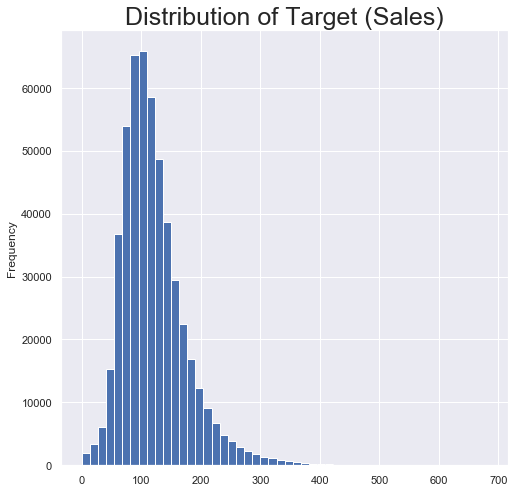

In [9]:
df['Sales'].plot(kind='hist', bins=50, figsize=[8,8])
plt.title('Distribution of Target (Sales)', size=25)
plt.show()

<Figure size 576x576 with 0 Axes>

Text(0.5, 1.0, 'Day Number by Sales')

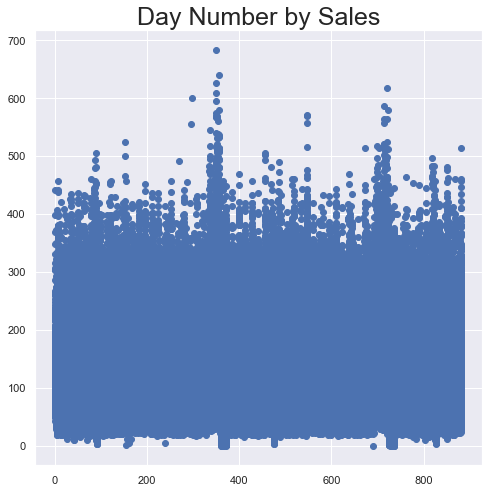

In [10]:
plt.figure(figsize=[8,8])
plt.scatter(df['Day_No'], df['Sales'])
plt.title('Day Number by Sales', size=25)
plt.show()

Text(0.5, 1.0, 'Course Domain Distribution')

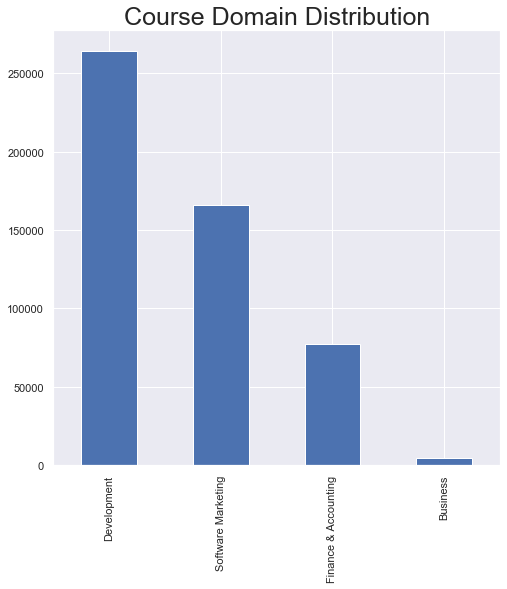

In [11]:
df['Course_Domain'].value_counts().plot(kind='bar', figsize=[8,8])
plt.title('Course Domain Distribution', size=25)
plt.show()

Text(0.5, 1.0, 'Course Domain Distribution by Sales Average')

Text(0.5, 0, 'Course Domain')

Text(0, 0.5, 'Sales Average')

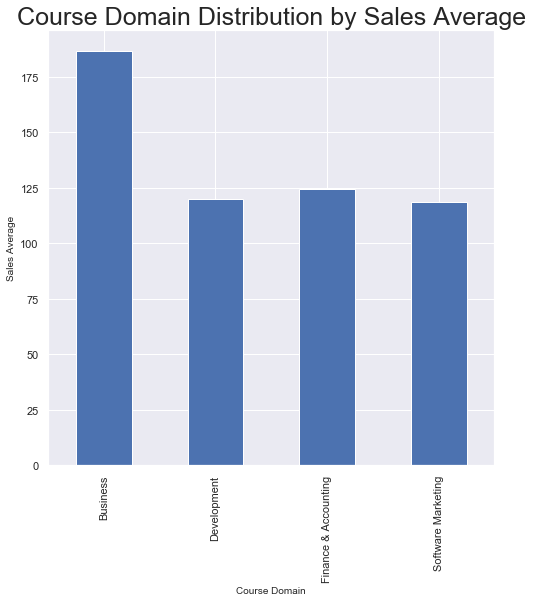

In [12]:
df.groupby('Course_Domain')['Sales'].mean().plot(kind='bar', figsize=[8,8])
plt.title('Course Domain Distribution by Sales Average', size=25)
plt.xlabel('Course Domain', size=10)
plt.ylabel('Sales Average', size=10)
plt.show()

Text(0.5, 1.0, 'Distribution of Course Type')

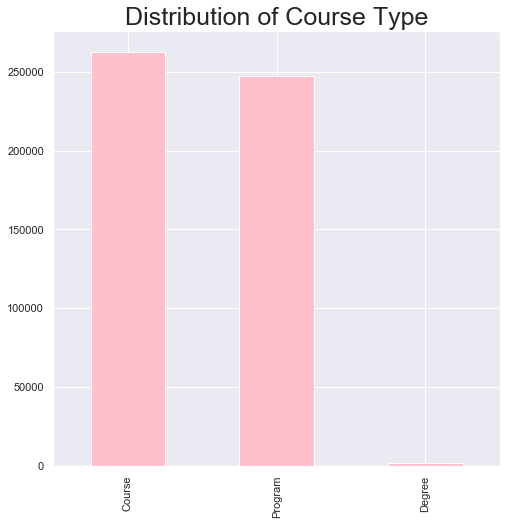

In [13]:
df['Course_Type'].value_counts().plot(kind='bar', figsize=[8,8], color='pink')
plt.title('Distribution of Course Type', size=25)
plt.show()

Text(0.5, 1.0, 'Course Type Distribution by Sales Average')

Text(0.5, 0, 'Course Type')

Text(0, 0.5, 'Sales Average')

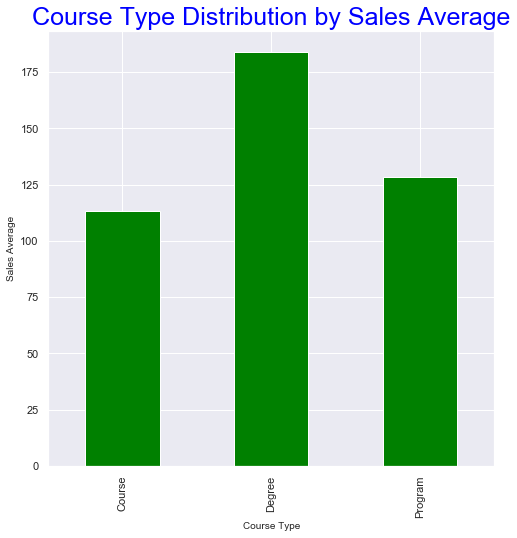

In [14]:
df.groupby('Course_Type')['Sales'].mean().plot(kind='bar', figsize=[8,8], color='green')
plt.title('Course Type Distribution by Sales Average', size=25, color='blue')
plt.xlabel('Course Type', size=10)
plt.ylabel('Sales Average', size=10)
plt.show()

In [15]:
col_to_dummy = ['Course_Type', 'Course_Domain', 'Public_Holiday']
df = df.drop(['ID', 'Day_No'], axis=1)
# df['Competition_Metric'] = df['Competition_Metric'] * 100
# test['Competition_Metric'] = test['Competition_Metric'] * 100
# from sklearn.preprocessing import LabelEncoder
# lb = LabelEncoder()
# df['Course_Type'] = lb.fit_transform(df['Course_Type'])
# df['Course_Domain'] = lb.fit_transform(df['Course_Domain'])

df = pd.get_dummies(data=df, columns=col_to_dummy)

df.head()

,Course_ID,Short_Promotion,Long_Promotion,User_Traffic,Competition_Metric,Sales,Course_Type_Course,Course_Type_Degree,Course_Type_Program,Course_Domain_Business,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Public_Holiday_0,Public_Holiday_1
0,1,0,1,11004,0.007,81,1,0,0,0,1,0,0,0,1
1,1,0,1,13650,0.007,79,1,0,0,0,1,0,0,1,0
2,1,0,1,11655,0.007,75,1,0,0,0,1,0,0,1,0
3,1,0,1,12054,0.007,80,1,0,0,0,1,0,0,1,0
4,1,0,1,6804,0.007,41,1,0,0,0,1,0,0,1,0


<Figure size 576x576 with 0 Axes>

Text(0.5, 1.0, 'Distribution of User Traffic')

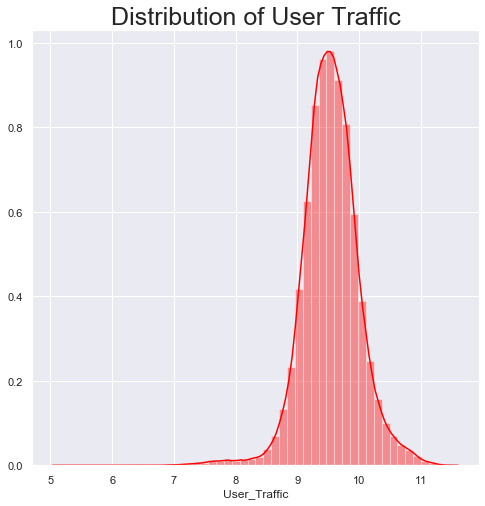

In [16]:
plt.figure(figsize=[8,8])
sns.distplot(np.log(df['User_Traffic']), color='red')
plt.title('Distribution of User Traffic', size=25)
plt.show()

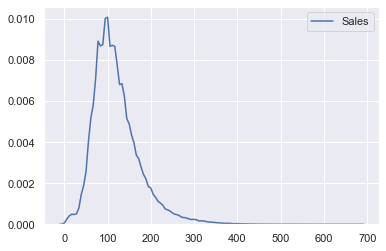

In [17]:
sns.kdeplot(df['Sales'])

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Competition Metric with Sales')

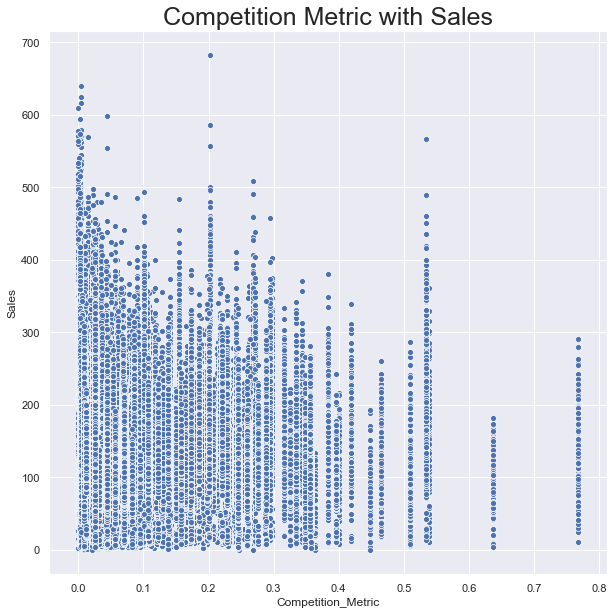

In [18]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=df, x='Competition_Metric', y='Sales', markers='+')
plt.title('Competition Metric with Sales', size=25)

Text(0.5, 1.0, 'Short Promotion Distribution On Sales Average')

Text(0.5, 0, 'Short_Promotion')

Text(0, 0.5, 'Average Sales')

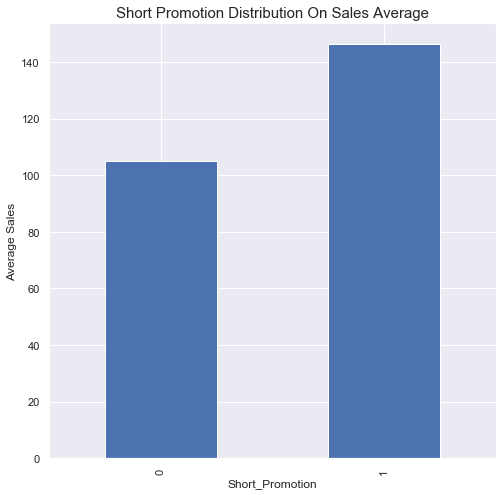

In [19]:
df.groupby('Short_Promotion')['Sales'].mean().plot(kind='bar', figsize=[8,8])
plt.title('Short Promotion Distribution On Sales Average', size=15)
plt.xlabel('Short_Promotion')
plt.ylabel('Average Sales')

Text(0.5, 1.0, 'Long Promotion Distribution On Sales Average')

Text(0.5, 0, 'Long Promotion')

Text(0, 0.5, 'Average Sales')

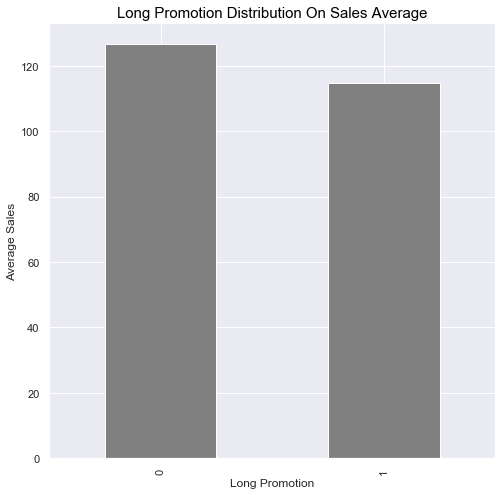

In [20]:
df.groupby('Long_Promotion')['Sales'].mean().plot(kind='bar', figsize=[8,8], color='grey')
plt.title('Long Promotion Distribution On Sales Average', size=15, color='black')
plt.xlabel('Long Promotion')
plt.ylabel('Average Sales')

<Figure size 720x720 with 0 Axes>

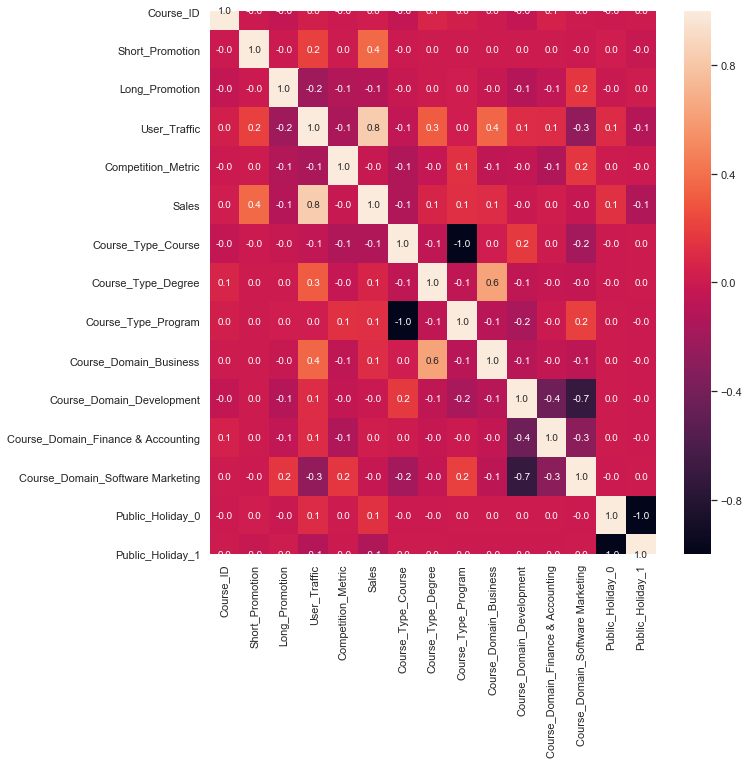

In [21]:
plt.figure(figsize=[10,10])
corr = df.corr()['Sales']
sns.heatmap(df.corr(), fmt='.1f', annot=True)

In [22]:
df['Competition_Metric'] = df['Competition_Metric'].fillna(method='ffill')
test['Competition_Metric'] = test['Competition_Metric'].fillna(method='ffill')


In [23]:
df.drop('User_Traffic', axis=1, inplace=True)
ID = test['ID']
test = test.drop(['ID', 'Day_No'], axis=1)
test = pd.get_dummies(data=test, columns=col_to_dummy)
# test['Course_Type'] = lb.fit_transform(test['Course_Type'])
# test['Course_Domain'] = lb.fit_transform(test['Course_Domain'])


test.head()

,Course_ID,Short_Promotion,Long_Promotion,Competition_Metric,Course_Type_Course,Course_Type_Degree,Course_Type_Program,Course_Domain_Business,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Public_Holiday_0,Public_Holiday_1
0,1,1,1,0.007,1,0,0,0,1,0,0,1,0
1,1,1,1,0.007,1,0,0,0,1,0,0,1,0
2,1,1,1,0.007,1,0,0,0,1,0,0,1,0
3,1,1,1,0.007,1,0,0,0,1,0,0,1,0
4,1,0,1,0.007,1,0,0,0,1,0,0,1,0


In [24]:
X = df.drop('Sales', axis=1)
y = df['Sales']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=22, test_size=.2)
print(X_train.shape)
print(X_val.shape)
print(y_val.shape)
print(y_train.shape)

(409669, 13)
(102418, 13)
(102418,)
(409669,)


In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
test_v = sc.transform(test)

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
from sklearn import metrics
y_pred = lr.predict(abs(X_val))

RMSLE = np.sqrt(metrics.mean_squared_log_error(y_pred, y_val))
print('RMSLE: ',round(RMSLE*1000, 4))

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [28]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
rf = RandomForestRegressor()
grb = GradientBoostingRegressor()

In [29]:
rf.fit(X_train, y_train)
rf.score(X_val, y_val)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

0.737583073253484

In [ ]:
grb.fit(X_train, y_train)
grb.score(X_val, y_val)

In [ ]:
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh', figsize=(10,8))
plt.title('Feature Importance', size=25)
plt.show()

In [ ]:
new_df = df[['Course_ID', 'Competition_Metric', 'Long_Promotion', 'Short_Promotion', 
            'Course_Domain', 'Course_Type', 'Public_Holiday']]
new_test = test[new_df.columns]

new_X_train, new_X_val, new_y_train, new_y_val = train_test_split(new_df, y,
                                                                  random_state=42, test_size=0.2)

In [ ]:
from xgboost import XGBRegressor
xg = XGBRegressor(objective='reg:squarederror', learning_rate=0.1,max_depth=10) 
xg.fit(X_train, y_train)
xg.score(X_val, y_val)


In [ ]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(learning_rate=0.6)
lgbm.fit(X_train, y_train)
lgbm.score(X_val, y_val)

In [ ]:
RMSLE = np.sqrt(metrics.mean_squared_log_error(lgbm.predict(X_val), y_val))
print('RMSLE: ',round(RMSLE*1000, 4))

In [ ]:
from catboost import Pool, CatBoostRegressor
eval_dataset = Pool(X_val, y_val)
cat_model = CatBoostRegressor(eval_metric='MSLE', learning_rate=0.2)
cat_model.fit(X_train, y_train, eval_set=eval_dataset)
print("R^2 Score: ",cat_model.score(X_val, y_val))
RMSLE = np.sqrt(metrics.mean_squared_log_error(cat_model.predict(X_val), y_val))
print('RMSLE: ',round(RMSLE*1000, 4))

In [ ]:
print(c)

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lgbm, df, y, scoring='neg_mean_squared_log_error', cv=7)
print('CV RMSLE:', np.sqrt(abs(score).mean()))

In [ ]:
# Plot predicted vs actual
plt.figure(figsize=[15,8])
plt.scatter(y_val, lgbm.predict(X_val), alpha=0.3, color='black', marker='*')
plt.plot(y_val, y_val, color='red') # A straight line - we want to be close to this
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
# plt.savefig('pred_vs_actual_quick_xg_sequential_split.png')

In [31]:
from catboost import CatBoostRegressor
cat_model = CatBoostRegressor(iterations=2000,
                            learning_rate = 0.004,
                            depth=8,
                            eval_metric='RMSE',
                            random_seed=42,
                            bagging_temperature=0.4,
                            od_type='Iter',
                            metric_period=50,
                            od_wait=20)
cat_model.fit(X_train, y_train, eval_set=(X_val, y_val), use_best_model=True, verbose=50)

0:	learn: 54.2426253	test: 54.4882205	best: 54.4882205 (0)	total: 455ms	remaining: 15m 8s
50:	learn: 51.4768107	test: 51.7099525	best: 51.7099525 (50)	total: 13.7s	remaining: 8m 44s
100:	learn: 49.5028469	test: 49.7152311	best: 49.7152311 (100)	total: 25.2s	remaining: 7m 54s
150:	learn: 48.0718330	test: 48.2674820	best: 48.2674820 (150)	total: 31s	remaining: 6m 19s
200:	learn: 47.0393871	test: 47.2210338	best: 47.2210338 (200)	total: 36.5s	remaining: 5m 26s
250:	learn: 46.2430734	test: 46.4154279	best: 46.4154279 (250)	total: 42.2s	remaining: 4m 54s
300:	learn: 45.5635933	test: 45.7288747	best: 45.7288747 (300)	total: 47.6s	remaining: 4m 28s
350:	learn: 45.0034074	test: 45.1622565	best: 45.1622565 (350)	total: 55.2s	remaining: 4m 19s
400:	learn: 44.5389884	test: 44.6900723	best: 44.6900723 (400)	total: 1m 7s	remaining: 4m 30s
450:	learn: 44.1419268	test: 44.2883912	best: 44.2883912 (450)	total: 1m 20s	remaining: 4m 35s
500:	learn: 43.7605780	test: 43.9014669	best: 43.9014669 (500)	tota

In [ ]:
rf.fit(X, y)

In [33]:
def run_xgb(train_X, train_y, val_X, val_y, test_X):
    import xgboost as xgb
    params = {'objective': 'reg:squarederror',
             'eval_metric': 'rmse',
              'learning_rate': 0.004,
             'eta': 0.001,
             'max_depth': 7,
             'subsample': 0.6,
             'colsample_bytree':0.6,
             'alpha':0.001,
             'random_state':42,
             'silent':True}
    tr_data = xgb.DMatrix(train_X, train_y)
    va_data = xgb.DMatrix(val_X, val_y)
    watchlist = [(tr_data, 'train'), (va_data, 'valid')]
    model_xgb = xgb.train(params, tr_data, 5000, watchlist, maximize=False, early_stopping_rounds=100,
                         verbose_eval=100)
    dtest = xgb.DMatrix(test_X)
    xgb_pred_y = model_xgb.predict(dtest, ntree_limit=model_xgb.best_ntree_limit)
    
    return xgb_pred_y, model_xgb

In [34]:
# Training XGB
pred_test_xgb, model_xgb = run_xgb(X_train, y_train, X_val, y_val, test_v)
print('XGB Training Completed')

c:\users\abuton\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-rmse:131.503	valid-rmse:131.902
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 100 rounds.
[100]	train-rmse:94.7043	valid-rmse:95.0645
[200]	train-rmse:71.7562	valid-rmse:72.0787
[300]	train-rmse:58.0441	valid-rmse:58.3356
[400]	train-rmse:49.9287	valid-rmse:50.1939
[500]	train-rmse:45.1819	valid-rmse:45.4248
[600]	train-rmse:42.23	valid-rmse:42.4578
[700]	train-rmse:40.537	valid-rmse:40.7531
[800]	train-rmse:39.2348	valid-rmse:39.445
[900]	train-rmse:38.3469	valid-rmse:38.5513
[1000]	train-rmse:37.7252	valid-rmse:37.9263
[1100]	train-rmse:37.1343	valid-rmse:37.333
[1200]	train-rmse:36.6273	valid-rmse:36.8257
[1300]	train-rmse:36.1512	valid-rmse:36.349
[1400]	train-rmse:35.7194	valid-rmse:35.9168
[1500]	train-rmse:35.3132	valid-rmse:35.5115
[1600]	train-rmse:34.9184	valid-rmse:35.1185
[1700]	train-rmse:34.6145	valid-rmse:34.8151
[1800]	train-rmse:34.2689	valid-rmse:34.471
[1900]	train-rmse:

In [38]:
prediction = cat_model.predict(test_v)
pd.DataFrame({'ID':ID, 'Sales':pred_test_xgb}).to_csv('stacked2.csv', index=False)
print('Done........')

Done........


In [ ]:
# Stacked Model
a = pd.read_csv('stacked1.csv')
b = pd.read_csv('submission3.csv')
c = pd.read_csv('submission2.csv')

# d = (a['Sales']*0.5 + b['Sales']*0.3 + c['Sales']*0.2)

In [ ]:
a['Sales']